In [1]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
import lime
from lime import lime_tabular
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import shap

In [3]:
dataset=pd.read_csv('merge.csv')
dataset.head()

timestamp        date (UTC)  NO2 (ppb)  VOC (ppb)  pm 10 (ug/m3)  \
0  1680841264  07-04-2023 04:21         58        161      42.242280   
1  1680841324  07-04-2023 04:22         58        163      44.033030   
2  1680841384  07-04-2023 04:23         60        162      40.469963   
3  1680841444  07-04-2023 04:24         58        163      34.787033   
4  1680841504  07-04-2023 04:25         60        163      45.632010   

   pm 2.5 (ug/m3)  pm 1 (ug/m3)  class  
0       36.364796          23.0      1  
1       43.033030          28.0      1  
2       39.469963          28.0      1  
3       33.787033          22.0      1  
4       44.632010          29.0      1

In [4]:
dataset = dataset.drop(dataset.columns[[0, 1]], axis=1)
dataset=dataset.drop(dataset.columns[[5]], axis=1)

In [5]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(missing_values=np.nan,strategy='mean')

imputer.fit(dataset)
dataset=imputer.transform(dataset)
X=dataset

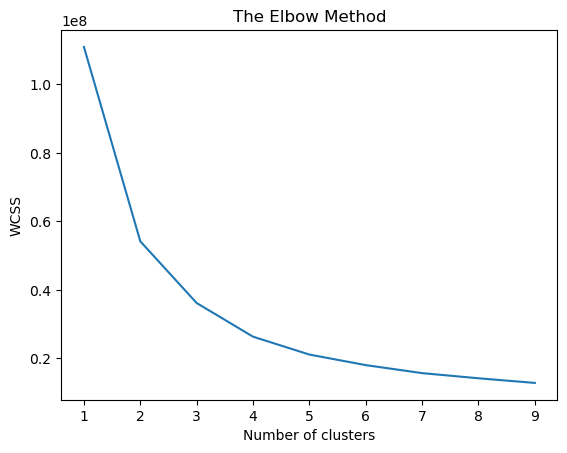

In [6]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 10), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [7]:
import math

from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.cluster import KMeans , kmeans_plusplus , MeanShift , DBSCAN , Birch , AffinityPropagation , OPTICS , AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
import plotly.express as px
import plotly.graph_objects as go

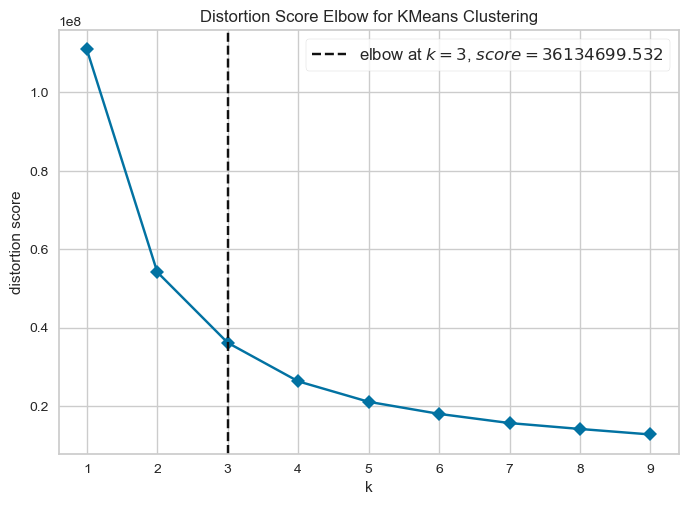

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [8]:
X=np.array(X)
model=KMeans()
visualizer=KElbowVisualizer(model,k=(1,10),timings=False)
visualizer.fit(X)
visualizer.show()


In [12]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

KMeans(n_clusters=3)

In [13]:
labels = kmeans.labels_

In [14]:
y_clusters = kmeans.fit_predict(X)
X1=X
X1.shape

(10558, 5)

In [15]:
pca = PCA(n_components=3)  
reduced_data = pca.fit_transform(X)

In [16]:
X=reduced_data

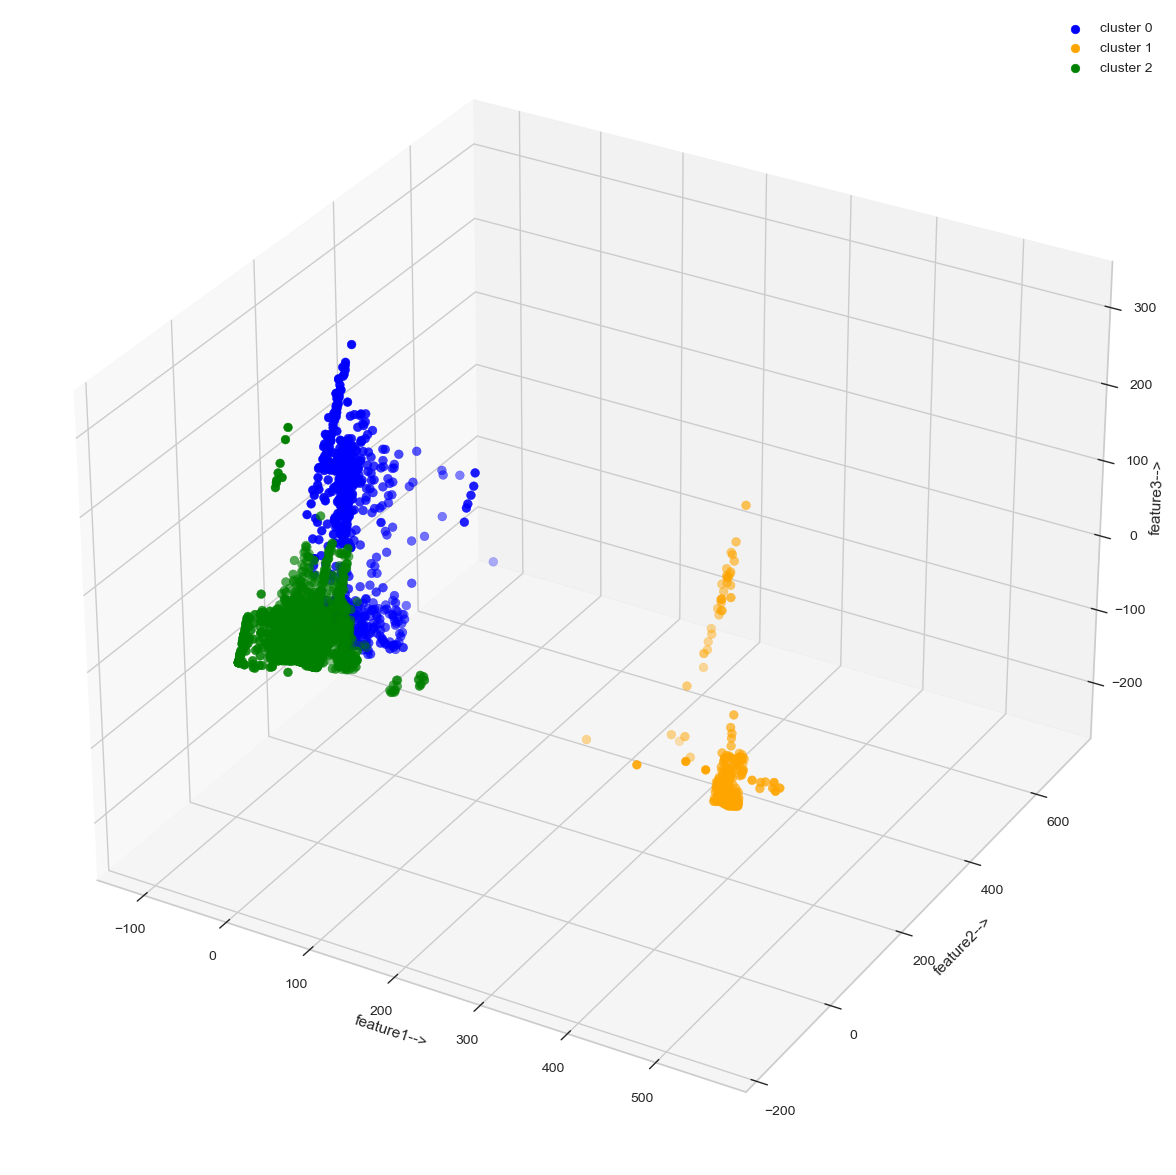

In [17]:
fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[y_clusters == 0,0],X[y_clusters == 0,1],X[y_clusters == 0,2], s = 40 , color = 'blue', label = "cluster 0")
ax.scatter(X[y_clusters == 1,0],X[y_clusters == 1,1],X[y_clusters == 1,2], s = 40 , color = 'orange', label = "cluster 1")
ax.scatter(X[y_clusters == 2,0],X[y_clusters == 2,1],X[y_clusters == 2,2], s = 40 , color = 'green', label = "cluster 2")
#ax.scatter(X[y_clusters == 3,0],X[y_clusters == 3,1],X[y_clusters == 3,2], s = 40 , color = '#D12B60', label = "cluster 3")
#ax.scatter(X[y_clusters == 4,0],X[y_clusters == 4,1],X[y_clusters == 4,2], s = 40 , color = 'purple', label = "cluster 4")
ax.set_xlabel('feature1-->')
ax.set_ylabel('feature2-->')
ax.set_zlabel('feature3-->')
ax.legend()
plt.show()

In [18]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)
from sklearn.metrics import silhouette_score, adjusted_rand_score
from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples=10000, centers=3, random_state=42)
kmeans = KMeans(n_clusters=3, random_state=42)
y_pred = kmeans.fit_predict(X)

silhouette_avg = silhouette_score(X, y_pred)
print(f"Silhouette Score: {silhouette_avg}")


Silhouette Score: 0.8411357171702263


In [20]:
X=X1


In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_kmeans, test_size = 0.3, random_state = 10)

In [22]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 100)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[  81    0    0]
 [   0 2885    1]
 [   0    6  195]]


0.9977904040404041

In [23]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[  81    0    0]
 [   0 2790   96]
 [   0    1  200]]


0.9693813131313131

In [24]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 50)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[  81    0    0]
 [   0 2883    3]
 [   0    2  199]]


0.9984217171717171

In [25]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 100)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[  81    0    0]
 [   0 2883    3]
 [   0    8  193]]


0.9965277777777778

In [26]:
replacements={0:0,1:1,2:1}
y0_kmeans = np.array([replacements.get(val, val) for val in y_kmeans])

In [27]:
from sklearn.model_selection import train_test_split
X0_train, X0_test, y0_train, y0_test = train_test_split(X, y0_kmeans, test_size = 0.3, random_state = 100)

In [28]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 50)
classifier.fit(X0_train, y0_train)
y0_pred = classifier.predict(X0_test)
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y0_test, y0_pred)
print(cm)
accuracy_score(y0_test, y0_pred)

[[  84    0]
 [   0 3084]]


1.0

In [29]:
explainer = lime.lime_tabular.LimeTabularExplainer(X, feature_names=[f"Feature {i}" for i in range(X.shape[1])], class_names=[  ' class 0', ' not class 0'])

In [30]:
instance_idx = 6736
explanation = explainer.explain_instance(X[instance_idx], classifier.predict_proba)
explanation.show_in_notebook()
explainer = lime.lime_tabular.LimeTabularExplainer(X, feature_names=['NO2','VOC','PM10','PM2.5','PM1'], class_names=[  ' cluster 0', ' not cluster 0'])

In [31]:
replacements={0:0,1:1,2:0}
y1_kmeans = np.array([replacements.get(val, val) for val in y_kmeans])
from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(X, y1_kmeans, test_size = 0.3, random_state = 100)
from sklearn.tree import DecisionTreeClassifier
classifier1 = DecisionTreeClassifier(criterion = 'entropy', random_state = 50)
classifier1.fit(X1_train, y1_train)
explainer = lime.lime_tabular.LimeTabularExplainer(X1_train, feature_names=['NO2','VOC','PM10','PM2.5','PM1'], class_names=[  '  not cluster 1', ' cluster 1'])
instance_idx = 3000
explanation = explainer.explain_instance(X[instance_idx], classifier1.predict_proba)
explanation.show_in_notebook()

In [34]:
replacements={0:0,1:0,2:2}
y2_kmeans = np.array([replacements.get(val, val) for val in y_kmeans])
from sklearn.model_selection import train_test_split
X2_train, X2_test, y2_train, y2_test = train_test_split(X, y2_kmeans, test_size = 0.3, random_state = 100)
from sklearn.tree import DecisionTreeClassifier
classifier2 = DecisionTreeClassifier(criterion = 'entropy', random_state = 50)
classifier2.fit(X2_train, y2_train)

explainer = lime.lime_tabular.LimeTabularExplainer(X2_train, feature_names=['NO2','VOC','PM10','PM2.5','PM1'], class_names=[  ' not cluster 2', '   cluster 2'])
instance_idx = 221
explanation = explainer.explain_instance(X[instance_idx], classifier1.predict_proba)
explanation.show_in_notebook()

In [35]:
from sklearn.model_selection import train_test_split
X0_train, X0_test, y0_train, y0_test = train_test_split(X, y_kmeans, test_size = 0.3, random_state = 100)
from sklearn.tree import DecisionTreeClassifier
classifier1 = DecisionTreeClassifier(criterion = 'entropy', random_state = 50)
classifier1.fit(X0_train, y0_train)
instance_idx = 222
instance = X.iloc[instance_idx]
explainer=shap.Explainer(classifier1)
shap_values = explainer.shap_values(instance)
shap_values_np = np.array(shap_values)
shap.summary_plot(shap_values_np, X0_test, class_names=classifier.classes_, feature_names=columns, plot_type='bar')

AttributeError: 'numpy.ndarray' object has no attribute 'iloc'

In [39]:
from sklearn.model_selection import train_test_split
X0_train, X0_test, y0_train, y0_test = train_test_split(X, y_kmeans, test_size = 0.3, random_state = 100)

In [40]:
from sklearn.tree import DecisionTreeClassifier
classifier1 = DecisionTreeClassifier(criterion = 'entropy', random_state = 50)
classifier1.fit(X0_train, y0_train)

DecisionTreeClassifier(criterion='entropy', random_state=50)

In [42]:
X1 = pd.DataFrame(X)

In [44]:
columns=['No2','voc','pm10','pm2.5','pm1']

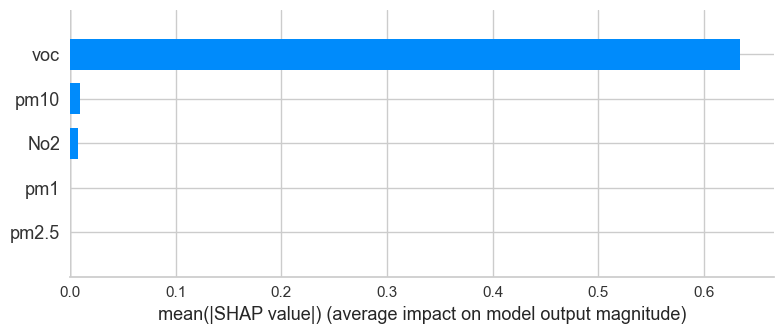

In [45]:
instance_idx = 222
instance = X1.iloc[instance_idx]
explainer=shap.Explainer(classifier1)
shap_values = explainer.shap_values(instance)
shap_values_np = np.array(shap_values)
shap.summary_plot(shap_values_np, X0_test, class_names=classifier.classes_, feature_names=columns, plot_type='bar')

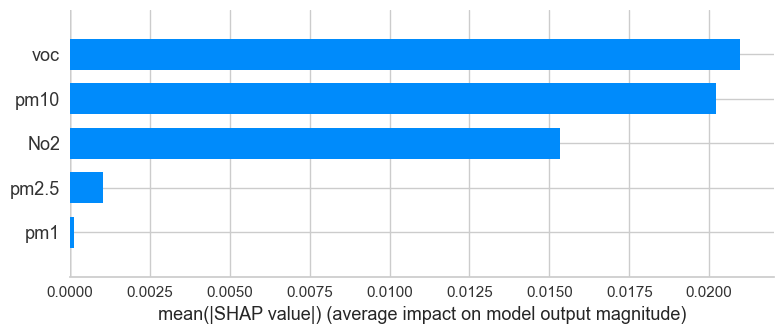

In [47]:
instance_idx = 3000
instance = X1.iloc[instance_idx]
explainer=shap.Explainer(classifier1)
shap_values = explainer.shap_values(instance)
shap_values_np = np.array(shap_values)
shap.summary_plot(shap_values_np, X0_test, class_names=classifier.classes_, feature_names=columns, plot_type='bar')

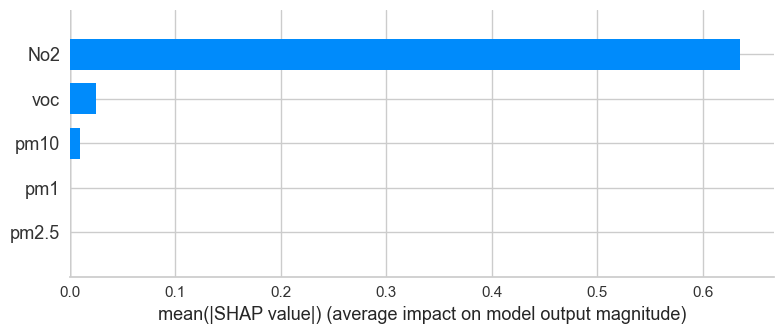

In [48]:
instance_idx = 6736
instance = X1.iloc[instance_idx]
explainer=shap.Explainer(classifier1)
shap_values = explainer.shap_values(instance)
shap_values_np = np.array(shap_values)
shap.summary_plot(shap_values_np, X0_test, class_names=classifier.classes_, feature_names=columns, plot_type='bar')

In [49]:
kmeans_initial = KMeans(n_clusters=3, random_state=42)
initial_clusters = kmeans_initial.fit_predict(X)
initial_centroids = kmeans_initial.cluster_centers_


In [50]:
df2=pd.read_csv('person-1 data.csv')
df2=df2[1044:2483]

In [51]:
df2.shape

(1439, 7)

In [52]:
df2 = df2.drop(df2.columns[[0, 1]], axis=1)

In [53]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(missing_values=np.nan,strategy='mean')

imputer.fit(df2)
df2=imputer.transform(df2)


In [54]:
kmeans_new = KMeans(n_clusters=3, random_state=42, init=initial_centroids)
new_clusters = kmeans_new.fit_predict(df2)

Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.


In [55]:
count0=0
count1=0
count2=0

for i  in range(0,len(new_clusters)):
    if(new_clusters[i]==0):
        count0+=1
    elif(new_clusters[i]==1):   
        count1+=1
    elif(new_clusters[i]==2):    
        count2+=1
        

In [56]:
print(count0,count1,count2)



72 815 552


In [57]:
print(((count0*494.848)+(count1*13.477)+(count2*12.5375))/1439,((count0*139.552)+(count1*156.859)+(count2*280.95))/1439,((count0*49.895)+(count1*24.50)+(count2*144.42))/1439)

37.20188394718554 203.5943217512161 71.77191104933982


In [58]:
dataset=pd.read_csv('merge.csv')

In [59]:
dataset = dataset.drop(dataset.columns[[0, 1]], axis=1)

In [60]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(missing_values=np.nan,strategy='mean')

imputer.fit(dataset)
dataset=imputer.transform(dataset)

In [61]:
X =dataset[:, :5]
y = dataset[:, -1]

In [62]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 10)

In [63]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 100)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=100)

In [64]:
y_pred = classifier.predict(X_test)

from sklearn.metrics import f1_score,accuracy_score
f1 = f1_score(y_test, y_pred, average='macro')

print('F1 Score: ', f1)


from sklearn.metrics import precision_score
precision = precision_score(y_test, y_pred, average='macro')

print('Precision: ', precision)


accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

from sklearn.metrics import recall_score
recall = recall_score(y_test,y_pred, average='micro')
print("Recall:", recall)

F1 Score:  0.8483961871154415
Precision:  0.8549665128019222
Accuracy: 0.9171401515151515
Recall: 0.9171401515151515


In [ ]:
y_pred = classifier.predict(X_test)